In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#Question1

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#Question 2:

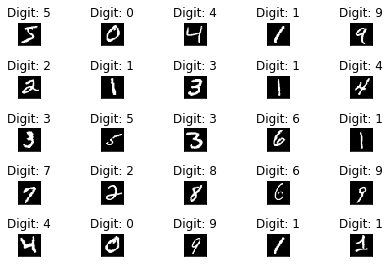

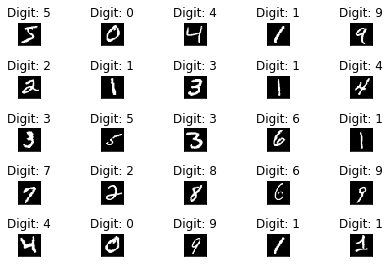

In [0]:
fig = plt.figure()
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

#Question 3:

In [0]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [0]:
print("class label for first image : {}".format(y_train[0]))
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("After converting class label of first image : {}".format(y_train[0]))

class label for first image : 5
After converting class label of first image : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#Question 4:




In [0]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


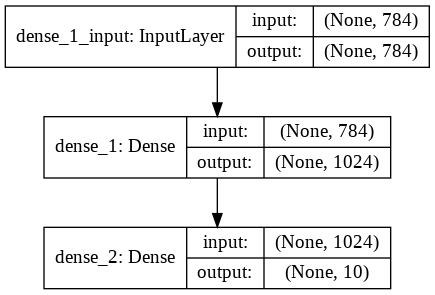

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
model.fit(X_train, y_train,
          batch_size=5000,
          epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





60000/60000 [==============================] - 9s 158us/step - loss: 11.5602 - acc: 0.2797
Epoch 2/50
60000/60000 [==============================] - 0s 4us/step - loss: 10.2013 - acc: 0.3659
Epoch 3/50
60000/60000 [==============================] - 0s 4us/step - loss: 10.1105 - acc: 0.3719
Epoch 4/50
60000/60000 [==============================] - 0s 4us/step - loss: 10.0701 - acc: 0.3743
Epoch 5/50
60000/60000 [==============================] - 0s 4us/step - loss: 10.0017 - acc: 0.3787
Epoch 6/50
60000/60000 [==============================] - 0s 4us/step - loss: 9.6764 - acc: 0.3988
Epoch 7/50
60000/60000 [==============================] - 0s 4us/step - loss: 8.4879 - acc: 0.4722
Epoch 8/50
60000/60000 [==============================] - 0s 4us/step - loss: 7.3633 - acc: 0.5414
Epoch 9/50
60000/60000 [==============================] - 0s 4us/step - loss: 7.0633 - acc: 0.5605


In [0]:
loss_and_metrics = model.evaluate(X_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 6.622036862945556
Test Accuracy 0.5888


#Question 5:

In [0]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

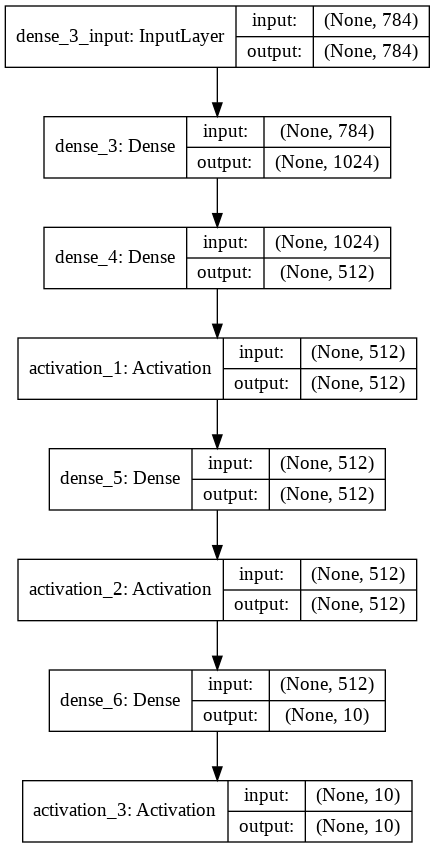

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
model.fit(X_train, y_train,
          batch_size=5000,
          epochs=50)

Epoch 1/50
60000/60000 [==============================] - 1s 10us/step - loss: 14.4840 - acc: 0.1010
Epoch 2/50
60000/60000 [==============================] - 0s 5us/step - loss: 14.4711 - acc: 0.1022
Epoch 3/50
60000/60000 [==============================] - 0s 5us/step - loss: 14.4711 - acc: 0.1022
Epoch 4/50
60000/60000 [==============================] - 0s 5us/step - loss: 14.4711 - acc: 0.1022
Epoch 5/50
60000/60000 [==============================] - 0s 5us/step - loss: 14.4711 - acc: 0.1022
Epoch 6/50
60000/60000 [==============================] - 0s 5us/step - loss: 14.4711 - acc: 0.1022
Epoch 7/50
60000/60000 [==============================] - 0s 5us/step - loss: 14.4711 - acc: 0.1022
Epoch 8/50
60000/60000 [==============================] - 0s 5us/step - loss: 14.4711 - acc: 0.1022
Epoch 9/50
60000/60000 [==============================] - 0s 5us/step - loss: 14.4711 - acc: 0.1022
Epoch 10/50
60000/60000 [==============================] - 0s 5us/step - loss: 14.4711 - acc: 0.102

In [0]:
loss_and_metrics = model.evaluate(X_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 14.490167527770996
Test Accuracy 0.101


#Question6

In [0]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape= (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10 ))
model.add(Activation('softmax'))

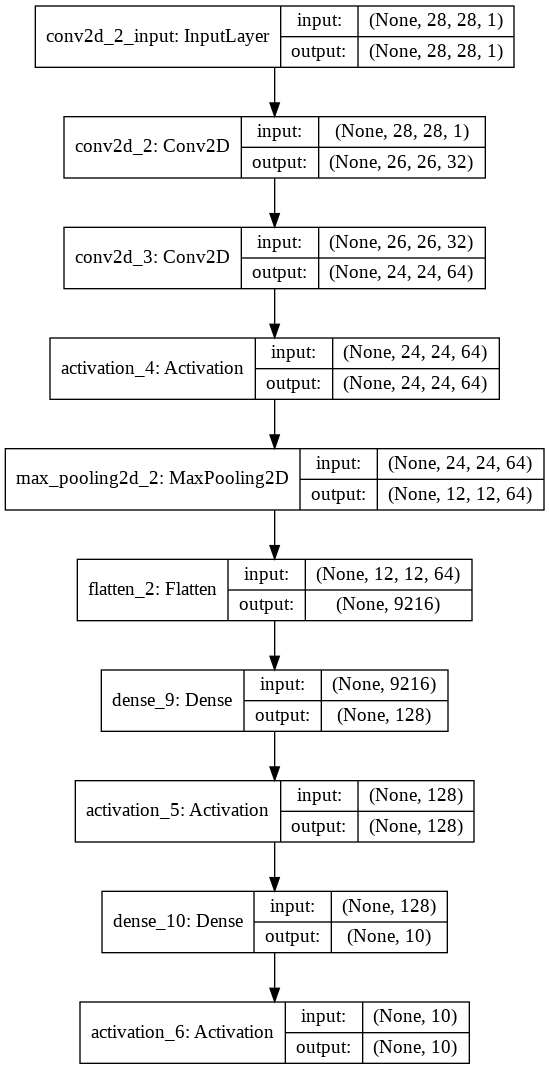

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=5000,
          epochs=50)

Epoch 1/50
60000/60000 [==============================] - 9s 148us/step - loss: 13.6794 - acc: 0.1472
Epoch 2/50
60000/60000 [==============================] - 3s 48us/step - loss: 13.1558 - acc: 0.1834
Epoch 3/50
60000/60000 [==============================] - 3s 48us/step - loss: 13.1051 - acc: 0.1867
Epoch 4/50
60000/60000 [==============================] - 3s 48us/step - loss: 13.0968 - acc: 0.1873
Epoch 5/50
60000/60000 [==============================] - 3s 48us/step - loss: 13.0927 - acc: 0.1876
Epoch 6/50
60000/60000 [==============================] - 3s 48us/step - loss: 13.0979 - acc: 0.1872
Epoch 7/50
60000/60000 [==============================] - 3s 48us/step - loss: 13.0858 - acc: 0.1880
Epoch 8/50
60000/60000 [==============================] - 3s 48us/step - loss: 13.0820 - acc: 0.1883
Epoch 9/50
60000/60000 [==============================] - 3s 48us/step - loss: 13.0795 - acc: 0.1884
Epoch 10/50
60000/60000 [==============================] - 3s 48us/step - loss: 13.0785 - 

#B. Save the model to json and .h5

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


#C. Load the model from disk

In [0]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk
